In [1]:
import pandas as pd
import numpy as np

In [57]:
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('winequality.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [32]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [33]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

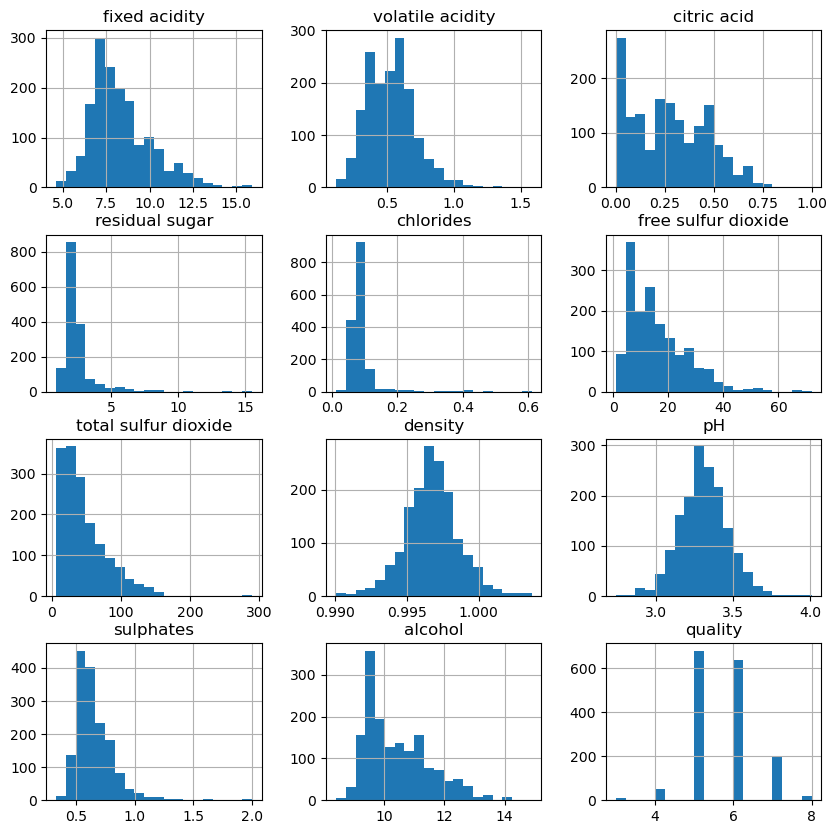

In [34]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

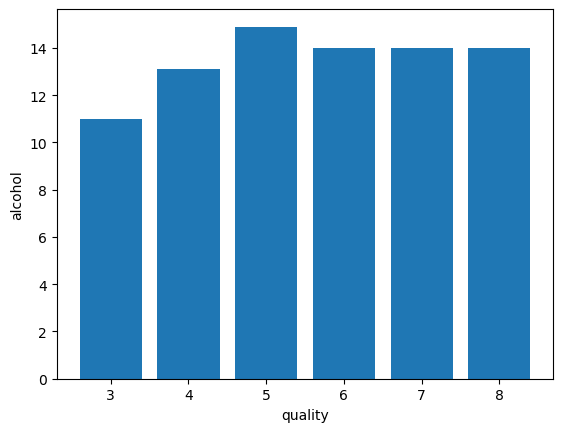

In [35]:

plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

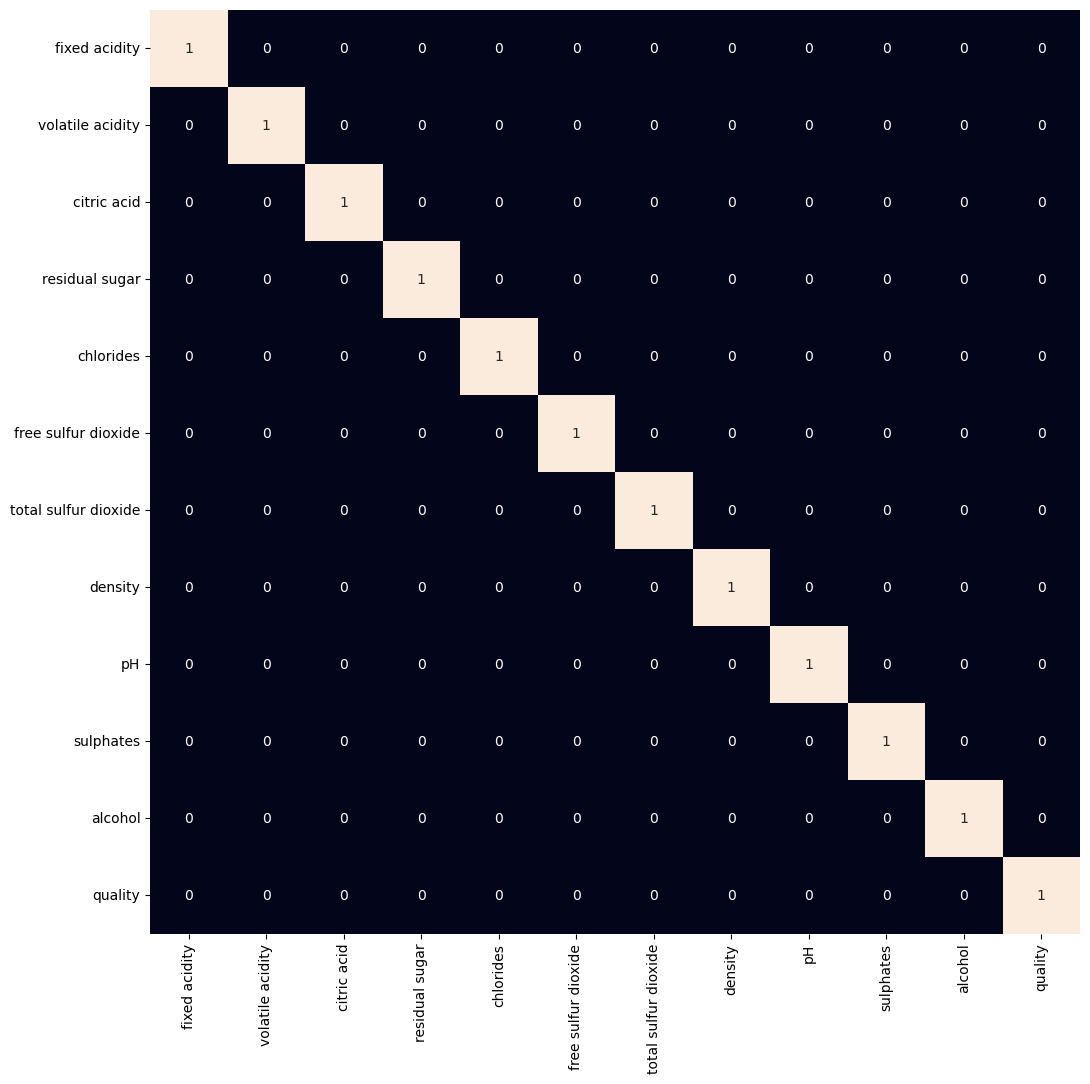

In [36]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [37]:
dub_wine=df.copy()
dub_wine.drop_duplicates(subset=None,inplace=True)

In [38]:
X = df[list(df.columns)[:-1]]

In [39]:
y=df['quality']

In [40]:
#divide the data into training and testing set 
X_train, X_test,y_train,y_test=train_test_split(X,y)

In [41]:

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_prediction=regressor.predict(X_test)

In [42]:

print('R-score is %s'%regressor.score(X_test,y_test))

R-score is 0.345781580462458


In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
regressor=LinearRegression()
#Computing score using 5 fold cross validation method. cv is used to determine the folds ie 5
scores=cross_val_score(regressor,X,y,cv=5)

In [46]:
print(scores.mean())

0.29004162884219664


In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler=MinMaxScaler()

In [50]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 858 to 1544
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1119 non-null   float64
 1   volatile acidity      1119 non-null   float64
 2   citric acid           1119 non-null   float64
 3   residual sugar        1119 non-null   float64
 4   chlorides             1119 non-null   float64
 5   free sulfur dioxide   1119 non-null   float64
 6   total sulfur dioxide  1119 non-null   float64
 7   density               1119 non-null   float64
 8   pH                    1119 non-null   float64
 9   sulphates             1119 non-null   float64
 10  alcohol               1119 non-null   float64
 11  quality               1119 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 113.6 KB


In [52]:
df_train.shape

(1119, 12)

In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1254 to 4
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         480 non-null    float64
 1   volatile acidity      480 non-null    float64
 2   citric acid           480 non-null    float64
 3   residual sugar        480 non-null    float64
 4   chlorides             480 non-null    float64
 5   free sulfur dioxide   480 non-null    float64
 6   total sulfur dioxide  480 non-null    float64
 7   density               480 non-null    float64
 8   pH                    480 non-null    float64
 9   sulphates             480 non-null    float64
 10  alcohol               480 non-null    float64
 11  quality               480 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 48.8 KB


In [54]:
df_train.shape

(1119, 12)

In [55]:
df_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
sns.pairplot(df_train) 
plt.show()

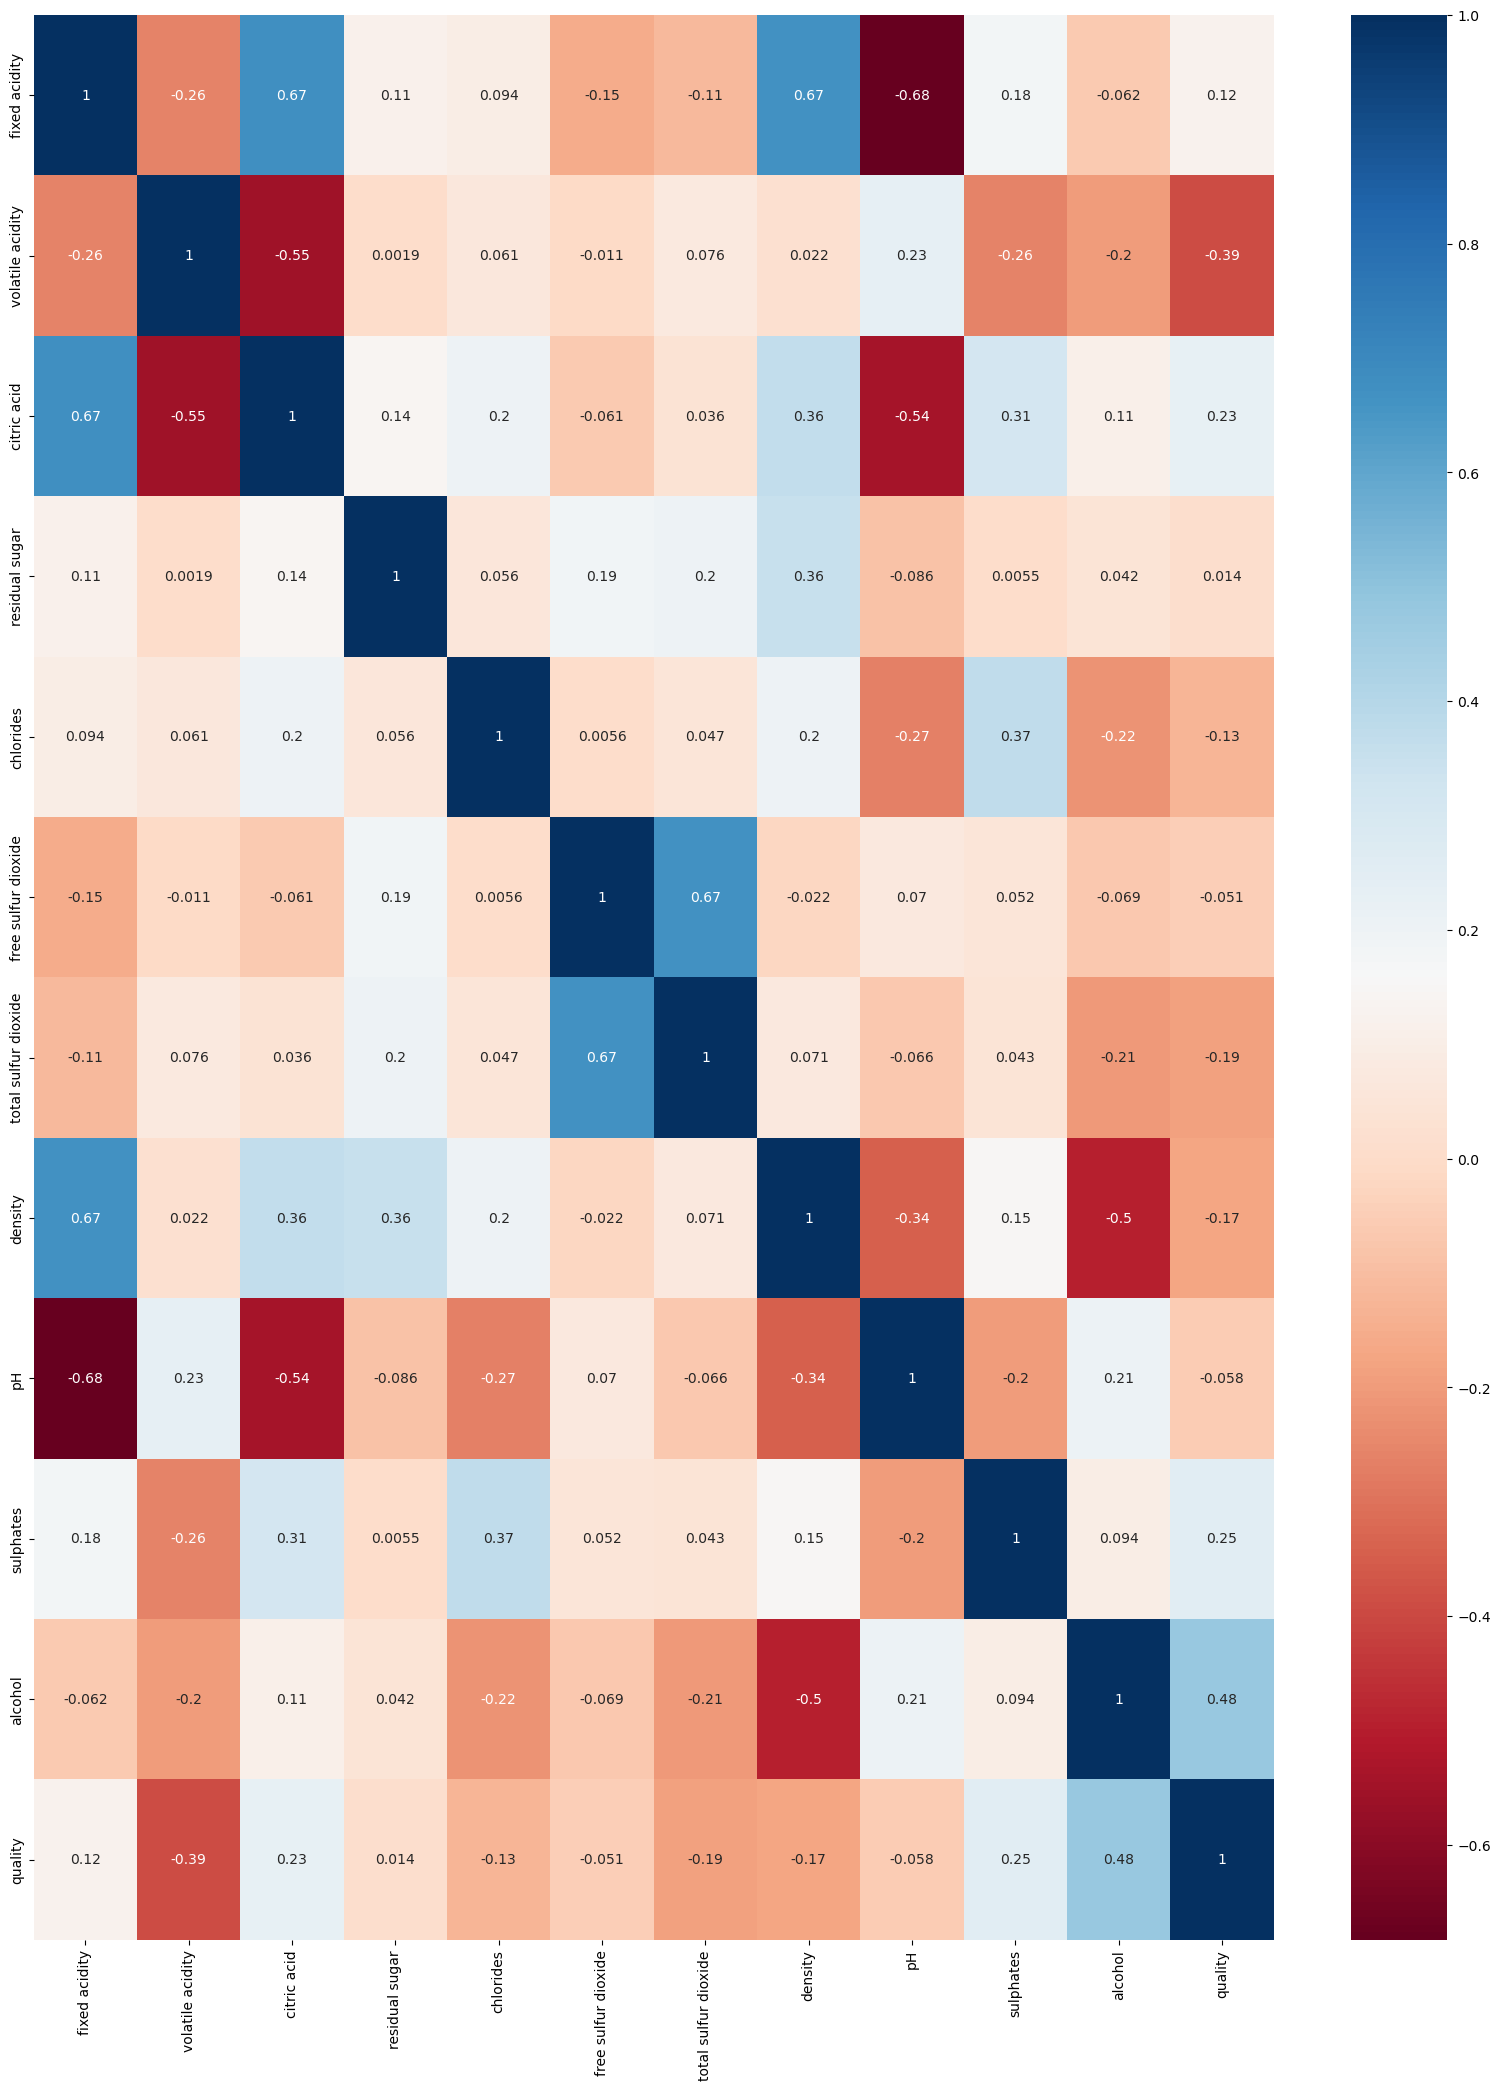

In [61]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(), annot=True,cmap='RdBu')
plt.show()

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler=MinMaxScaler()
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
858,11.7,0.28,0.47,1.70,0.054,17.0,32.0,0.99686,3.15,0.67,10.6,7
654,8.6,0.47,0.47,2.40,0.074,7.0,29.0,0.99790,3.08,0.46,9.5,5
721,8.9,0.48,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2,5
176,7.3,0.38,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
692,8.6,0.49,0.51,2.00,0.422,16.0,62.0,0.99790,3.03,1.17,9.0,5


In [64]:
df_train[:]=scaler.fit_transform(df_train[:])

In [65]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
858,0.642202,0.109589,0.47,0.054795,0.070234,0.225352,0.091873,0.498532,0.322835,0.184049,0.392857,0.8
654,0.357798,0.239726,0.47,0.102740,0.103679,0.084507,0.081272,0.574890,0.267717,0.055215,0.196429,0.4
721,0.385321,0.246575,0.24,0.133562,0.137124,0.478873,0.353357,0.596916,0.283465,0.098160,0.142857,0.4
176,0.238532,0.178082,0.21,0.075342,0.113712,0.084507,0.102473,0.442731,0.464567,0.061350,0.196429,0.4
692,0.357798,0.253425,0.51,0.075342,0.685619,0.211268,0.197880,0.574890,0.228346,0.490798,0.107143,0.4


In [66]:
y_train=df_train.pop('quality')
X_train=df_train
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
lm = LinearRegression()

# Create an RFE (Recursive Feature Elimination) object with the LinearRegression model and specify the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=9)

# Fit RFE on your training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=9)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fixed acidity', True, 1),
 ('volatile acidity', True, 1),
 ('citric acid', False, 2),
 ('residual sugar', True, 1),
 ('chlorides', True, 1),
 ('free sulfur dioxide', False, 3),
 ('total sulfur dioxide', True, 1),
 ('density', True, 1),
 ('pH', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [70]:
col = X_train.columns[rfe.support_]
col

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [71]:
X_train.columns[~rfe.support_]

Index(['citric acid', 'free sulfur dioxide'], dtype='object')

In [73]:
X_train_rfe = X_train[col]

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,density,82.44
0,fixed acidity,32.60
6,pH,29.86
8,alcohol,11.98
1,volatile acidity,7.50
7,sulphates,5.79
3,chlorides,4.56
2,residual sugar,3.76
4,total sulfur dioxide,2.67


In [75]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [76]:
lr1.params

const                   0.569556
fixed acidity           0.071580
volatile acidity       -0.296388
residual sugar          0.135193
chlorides              -0.235717
total sulfur dioxide   -0.167356
density                -0.121661
pH                     -0.088306
sulphates               0.301578
alcohol                 0.293251
dtype: float64

In [77]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     74.79
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          6.87e-108
Time:                        15:43:06   Log-Likelihood:                 713.30
No. Observations:                1119   AIC:                            -1407.
Df Residuals:                    1109   BIC:                            -1356.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5696 

In [78]:
X_train_new = X_train_rfe.drop(["residual sugar"], axis = 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,density,52.70
0,fixed acidity,24.79
5,pH,23.95
7,alcohol,9.03
1,volatile acidity,7.43
6,sulphates,5.60
2,chlorides,4.56
3,total sulfur dioxide,2.61


In [79]:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.params

const                   0.561169
fixed acidity          -0.003532
volatile acidity       -0.303366
chlorides              -0.233944
total sulfur dioxide   -0.151031
density                -0.006997
pH                     -0.135619
sulphates               0.279946
alcohol                 0.340207
dtype: float64

In [80]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     82.71
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.01e-107
Time:                        15:44:51   Log-Likelihood:                 709.50
No. Observations:                1119   AIC:                            -1401.
Df Residuals:                    1110   BIC:                            -1356.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5612 

In [81]:
X_train_new = X_train_new.drop(["density"], axis = 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,pH,11.40
1,volatile acidity,7.32
5,sulphates,5.50
6,alcohol,5.34
2,chlorides,4.44
0,fixed acidity,4.25
3,total sulfur dioxide,2.48


In [82]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.params

const                   0.560587
fixed acidity          -0.009130
volatile acidity       -0.303756
chlorides              -0.234794
total sulfur dioxide   -0.151812
pH                     -0.138753
sulphates               0.279234
alcohol                 0.342642
dtype: float64

In [83]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     94.61
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.00e-108
Time:                        15:45:40   Log-Likelihood:                 709.50
No. Observations:                1119   AIC:                            -1403.
Df Residuals:                    1111   BIC:                            -1363.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5606 

In [87]:
X_train_new = X_train_new.drop(["pH"], axis = 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,sulphates,5.30
2,chlorides,4.44
1,volatile acidity,4.38
0,fixed acidity,4.19
5,alcohol,3.58
3,total sulfur dioxide,2.41


In [88]:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.params

const                   0.476723
fixed acidity           0.060822
volatile acidity       -0.320842
chlorides              -0.194379
total sulfur dioxide   -0.134577
sulphates               0.275394
alcohol                 0.332236
dtype: float64

In [89]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.15e-107
Time:                        15:49:07   Log-Likelihood:                 705.08
No. Observations:                1119   AIC:                            -1396.
Df Residuals:                    1112   BIC:                            -1361.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4767 

In [91]:
X_train_new = X_train_new.drop(["sulphates"], axis = 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,volatile acidity,4.24
0,fixed acidity,3.80
2,chlorides,3.31
4,alcohol,3.04
3,total sulfur dioxide,2.35


In [92]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()
lr6.params

const                   0.504319
fixed acidity           0.080872
volatile acidity       -0.377327
chlorides              -0.046286
total sulfur dioxide   -0.118270
alcohol                 0.357105
dtype: float64

In [93]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     118.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.82e-100
Time:                        15:50:50   Log-Likelihood:                 686.45
No. Observations:                1119   AIC:                            -1361.
Df Residuals:                    1113   BIC:                            -1331.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5043 

In [94]:
X_train_new = X_train_new.drop(["chlorides"], axis = 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,volatile acidity,3.77
0,fixed acidity,3.30
3,alcohol,3.04
2,total sulfur dioxide,2.29


In [95]:
X_train_lm7 = sm.add_constant(X_train_new)
lr7 = sm.OLS(y_train, X_train_lm7).fit()
lr7.params

const                   0.498065
fixed acidity           0.078830
volatile acidity       -0.378732
total sulfur dioxide   -0.119029
alcohol                 0.361300
dtype: float64

In [96]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     147.7
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          2.17e-101
Time:                        15:51:32   Log-Likelihood:                 686.01
No. Observations:                1119   AIC:                            -1362.
Df Residuals:                    1114   BIC:                            -1337.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4981 

In [97]:
X_train_new = X_train_new.drop(["total sulfur dioxide"], axis = 1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fixed acidity,3.20
1,volatile acidity,3.16
2,alcohol,3.03


In [98]:
X_train_lm8 = sm.add_constant(X_train_new)
lr8 = sm.OLS(y_train, X_train_lm8).fit()
lr8.params

const               0.472434
fixed acidity       0.090361
volatile acidity   -0.380270
alcohol             0.376420
dtype: float64

In [99]:
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          3.99e-100
Time:                        15:52:21   Log-Likelihood:                 680.35
No. Observations:                1119   AIC:                            -1353.
Df Residuals:                    1115   BIC:                            -1333.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4724      0.018  

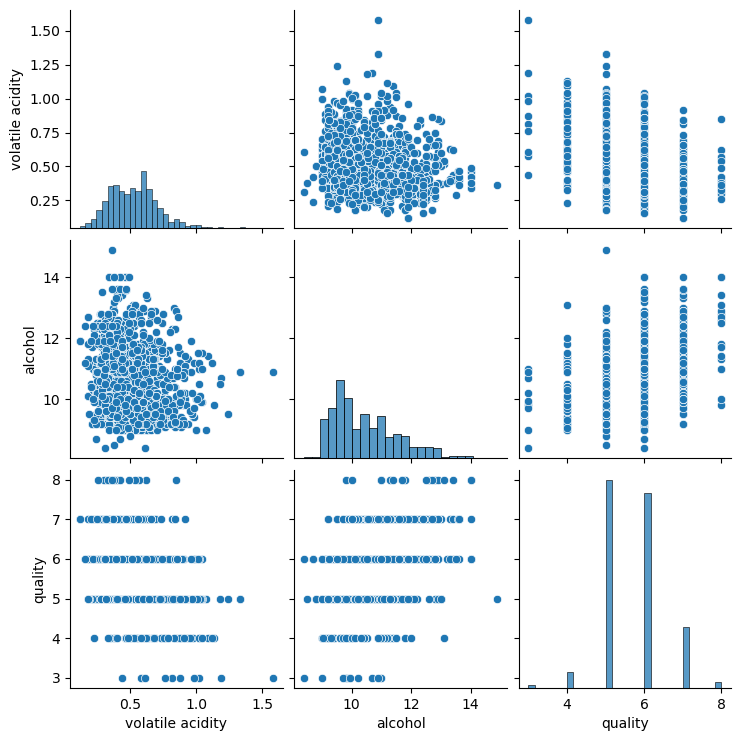

In [100]:
wine_num=df[[ 'volatile acidity', 'alcohol', 'quality']]

sns.pairplot(wine_num)
plt.show()

In [101]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,fixed acidity,3.20
1,volatile acidity,3.16
2,alcohol,3.03


In [102]:
df_test[:]=scaler.fit_transform(df_test[:])
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1254,0.283186,0.630435,0.078947,0.059829,0.111853,0.292308,0.103321,0.450839,0.514563,0.218182,0.384615,0.4
1087,0.292035,0.076087,0.552632,0.034188,0.075125,0.261538,0.084871,0.268585,0.407767,0.218182,0.430769,0.6
822,0.185841,0.456522,0.171053,0.068376,0.106845,0.215385,0.107011,0.532374,0.718447,0.187879,0.215385,0.4
1514,0.203540,0.782609,0.276316,0.247863,0.103506,0.230769,0.214022,0.621902,0.640777,0.236364,0.128205,0.6
902,0.247788,0.559783,0.131579,0.102564,0.113523,0.230769,0.095941,0.537170,0.689320,0.218182,0.369231,0.8


In [103]:
y_test = df_test.pop('quality')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1254 to 4
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         480 non-null    float64
 1   volatile acidity      480 non-null    float64
 2   citric acid           480 non-null    float64
 3   residual sugar        480 non-null    float64
 4   chlorides             480 non-null    float64
 5   free sulfur dioxide   480 non-null    float64
 6   total sulfur dioxide  480 non-null    float64
 7   density               480 non-null    float64
 8   pH                    480 non-null    float64
 9   sulphates             480 non-null    float64
 10  alcohol               480 non-null    float64
dtypes: float64(11)
memory usage: 45.0 KB


In [104]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1254 to 4
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             480 non-null    float64
 1   fixed acidity     480 non-null    float64
 2   volatile acidity  480 non-null    float64
 3   alcohol           480 non-null    float64
dtypes: float64(4)
memory usage: 18.8 KB


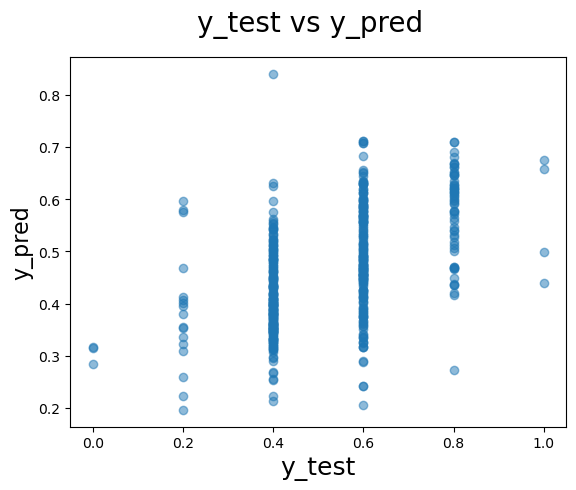

In [105]:
y_pred = lr8.predict(X_test_lm8)
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()


In [106]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
1254,0.4,0.40
1087,0.6,0.63
822,0.4,0.40
1514,0.6,0.24
902,0.8,0.42


<Axes: xlabel='Actual', ylabel='Predictions'>

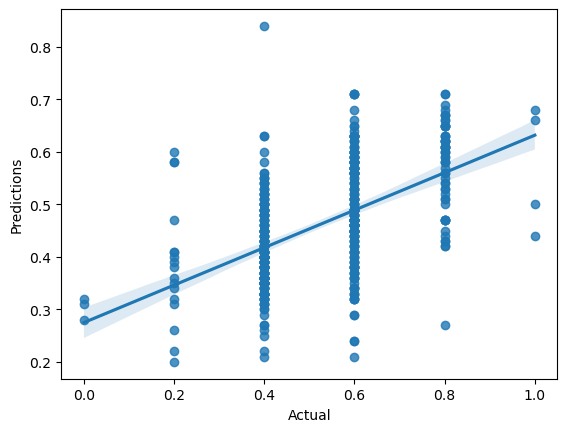

In [109]:
sns.regplot(x='Actual', y='Predictions', data=df)

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.10348362100468655

In [111]:
r2=0.32264089150785114
X_test.shape

(480, 3)

In [112]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.3183718214963459

In [113]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.11519204811355263
MSE: 0.022898522513505312
RMSE: 0.15132257767268345
